<h1>CP467 - Project</h1>

<ol>
    <h2>Members:</h2>
    <li>Duc Minh Nguyen - 203009140 - ducx9140@mylaurier.ca</li>
    <li>Quang Quynh Anh Lam - 190712100 </li>
    <li>Mohiuddin Usama - 212090340</li>
</ol>

<h2>Importing</h2>

In [119]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Color for each plotting box
COLORS = [
    (197, 215, 20),
    (132, 248, 207),
    (155, 244, 183),
    (111, 71, 144),
    (71, 48, 128),
    (75, 158, 50),
    (37, 169, 241),
    (51, 181, 222),
    (161, 104, 244),
    (226, 133, 31),
    (7, 47, 204),
    (0, 252, 170),
    (124, 166, 32),
    (97, 113, 122),
    (72, 229, 46),
    (41, 163, 250),
    (55, 154, 149)
]

<h2>Load Image</h2>

In [120]:
SCENE_DICT = {
 'Scene_1': 'S1.png',
 'Scene_2': 'S2.png',
 'Scene_3': 'S3.png',
 'Scene_4': 'S4.png',
 'Scene_5': 'S5.png',
 'Scene_6': 'S6.png',
 'Scene_7': 'S7.png',
 'Scene_8': 'S8.png',
 'Scene_9': 'S9.png',
 'Scene_10': 'S10.png',
 'Scene_11': 'S11.png',
 'Scene_12': 'S12.png',
 'Scene_13': 'S13.png',
 'Scene_14': 'S14.png',
 'Scene_15': 'S15.png',
 'Scene_16': 'S16.png',
 'Scene_17': 'S17.png',
 'Scene_18': 'S18.png',
 'Scene_19': 'S19.png',
 'Scene_20': 'S20.png',
}

OBJECT_DICT = {
 'Object_1': 'O1.png',
 'Object_2': 'O2.png',
 'Object_3': 'O3.png',
 'Object_4': 'O4.png',
 'Object_5': 'O5.png',
 'Object_6': 'O6.png',
 'Object_7': 'O7.png',
 'Object_8': 'O8.png',
 'Object_9': 'O9.png',
 'Object_10': 'O10.png',
 'Object_11': 'O11.png',
 'Object_12': 'O12.png',
 'Object_13': 'O13.png',
 'Object_14': 'O14.png',
 'Object_15': 'O15.png',
}

In [121]:
# Path to object and scene
PATH_OBJECT = "../../Objects/"
PATH_SCENE  = "../../Scenes/"


<h2>Task 1</h2>

In [122]:
# * Ground truth table is the object that we "human" think that is in the scene
ground_truth = {
    "Scene_1" : {'Object_1', 'Object_2', 'Object_3', 'Object_4', 'Object_5', 'Object_6','Object_7', 'Object_8', 'Object_9', 'Object_10','Object_11', 'Object_12', 'Object_13', 'Object_14', 'Object_15'},
    
    "Scene_2" : {'Object_1', 'Object_2', 'Object_3', 'Object_4', 'Object_5', 'Object_6','Object_7', 'Object_8', 'Object_9', 'Object_10','Object_11', 'Object_12', 'Object_13', 'Object_14', 'Object_15'},
    
    "Scene_3" : {'Object_1', 'Object_2', 'Object_3', 'Object_4', 'Object_5', 'Object_6','Object_7', 'Object_8', 'Object_9', 'Object_10','Object_11', 'Object_12', 'Object_13', 'Object_14', 'Object_15'},
    
    "Scene_4" : {'Object_1', 'Object_2', 'Object_3', 'Object_4', 'Object_5', 'Object_6','Object_7', 'Object_8', 'Object_9', 'Object_10','Object_11', 'Object_12', 'Object_13', 'Object_14', 'Object_15'},
    
    "Scene_5" : {'Object_1', 'Object_2', 'Object_3', 'Object_4', 'Object_5', 'Object_6','Object_7', 'Object_8', 'Object_9', 'Object_10','Object_11', 'Object_12', 'Object_13', 'Object_14', 'Object_15'},
    
    "Scene_6" : {'Object_1', 'Object_2', 'Object_3', 'Object_4', 'Object_6', 'Object_11', 'Object_15'},
    
    "Scene_7" : {'Object_2', 'Object_9', 'Object7', 'Object_8' 'Object_13', 'Object_14'},
    
    "Scene_8" : {'Object_1', 'Object_2', 'Object_3', 'Object_4', 'Object_6','Object_7', 'Object_8', 'Object_13', 'Object_14', 'Object_15'},
    
    "Scene_9" : {'Object_1', 'Object_2', 'Object_3', 'Object_4', 'Object_5', 'Object_6','Object_7', 'Object_8', 'Object_9', 'Object_10', 'Object_12', 'Object_13', 'Object_14', 'Object_15'},
    
    "Scene_10" : {'Object_4', 'Object_5', 'Object_6', 'Object_10'},
    
    "Scene_11" : {'Object_1', 'Object_4', 'Object_5', 'Object_6','Object_7', 'Object_8', 'Object_9', 'Object_10', 'Object_12', 'Object_13', 'Object_14', 'Object_15'},
    
    "Scene_12" : {'Object_1', 'Object_2', 'Object_3', 'Object_4', 'Object_7', 'Object_13', 'Object_14'},
    
    "Scene_13" : {'Object_1', 'Object_2', 'Object_3', 'Object_4','Object_7','Object_11', 'Object_13', 'Object_14', 'Object_15'},
    
    "Scene_14" : {'Object_7', 'Object_8', 'Object_9', 'Object_13'},
    
    "Scene_15" : {'Object_1', 'Object_2', 'Object_3', 'Object_4', 'Object_11'},
    
    "Scene_16" : {'Object_1', 'Object_2', 'Object_4', 'Object_5', 'Object_6','Object_7', 'Object_8', 'Object_9', 'Object_10', 'Object_12', 'Object_13', 'Object_14', 'Object_15'},
    
    "Scene_17" : {'Object_7', 'Object_8', 'Object_9', 'Object_13'},
    
    "Scene_18" : {'Object_7', 'Object_8', 'Object_9', 'Object_13'},
    
    "Scene_19" : {'Object_1', 'Object_2', 'Object_3', 'Object_4', 'Object_5', 'Object_6','Object_7', 'Object_8', 'Object_10','Object_11', 'Object_12', 'Object_13', 'Object_14', 'Object_15'},
    
    "Scene_20" : {'Object_1', 'Object_2', 'Object_4', 'Object_5', 'Object_6','Object_7', 'Object_8', 'Object_9', 'Object_10', 'Object_12', 'Object_13', 'Object_14', 'Object_15'}
}

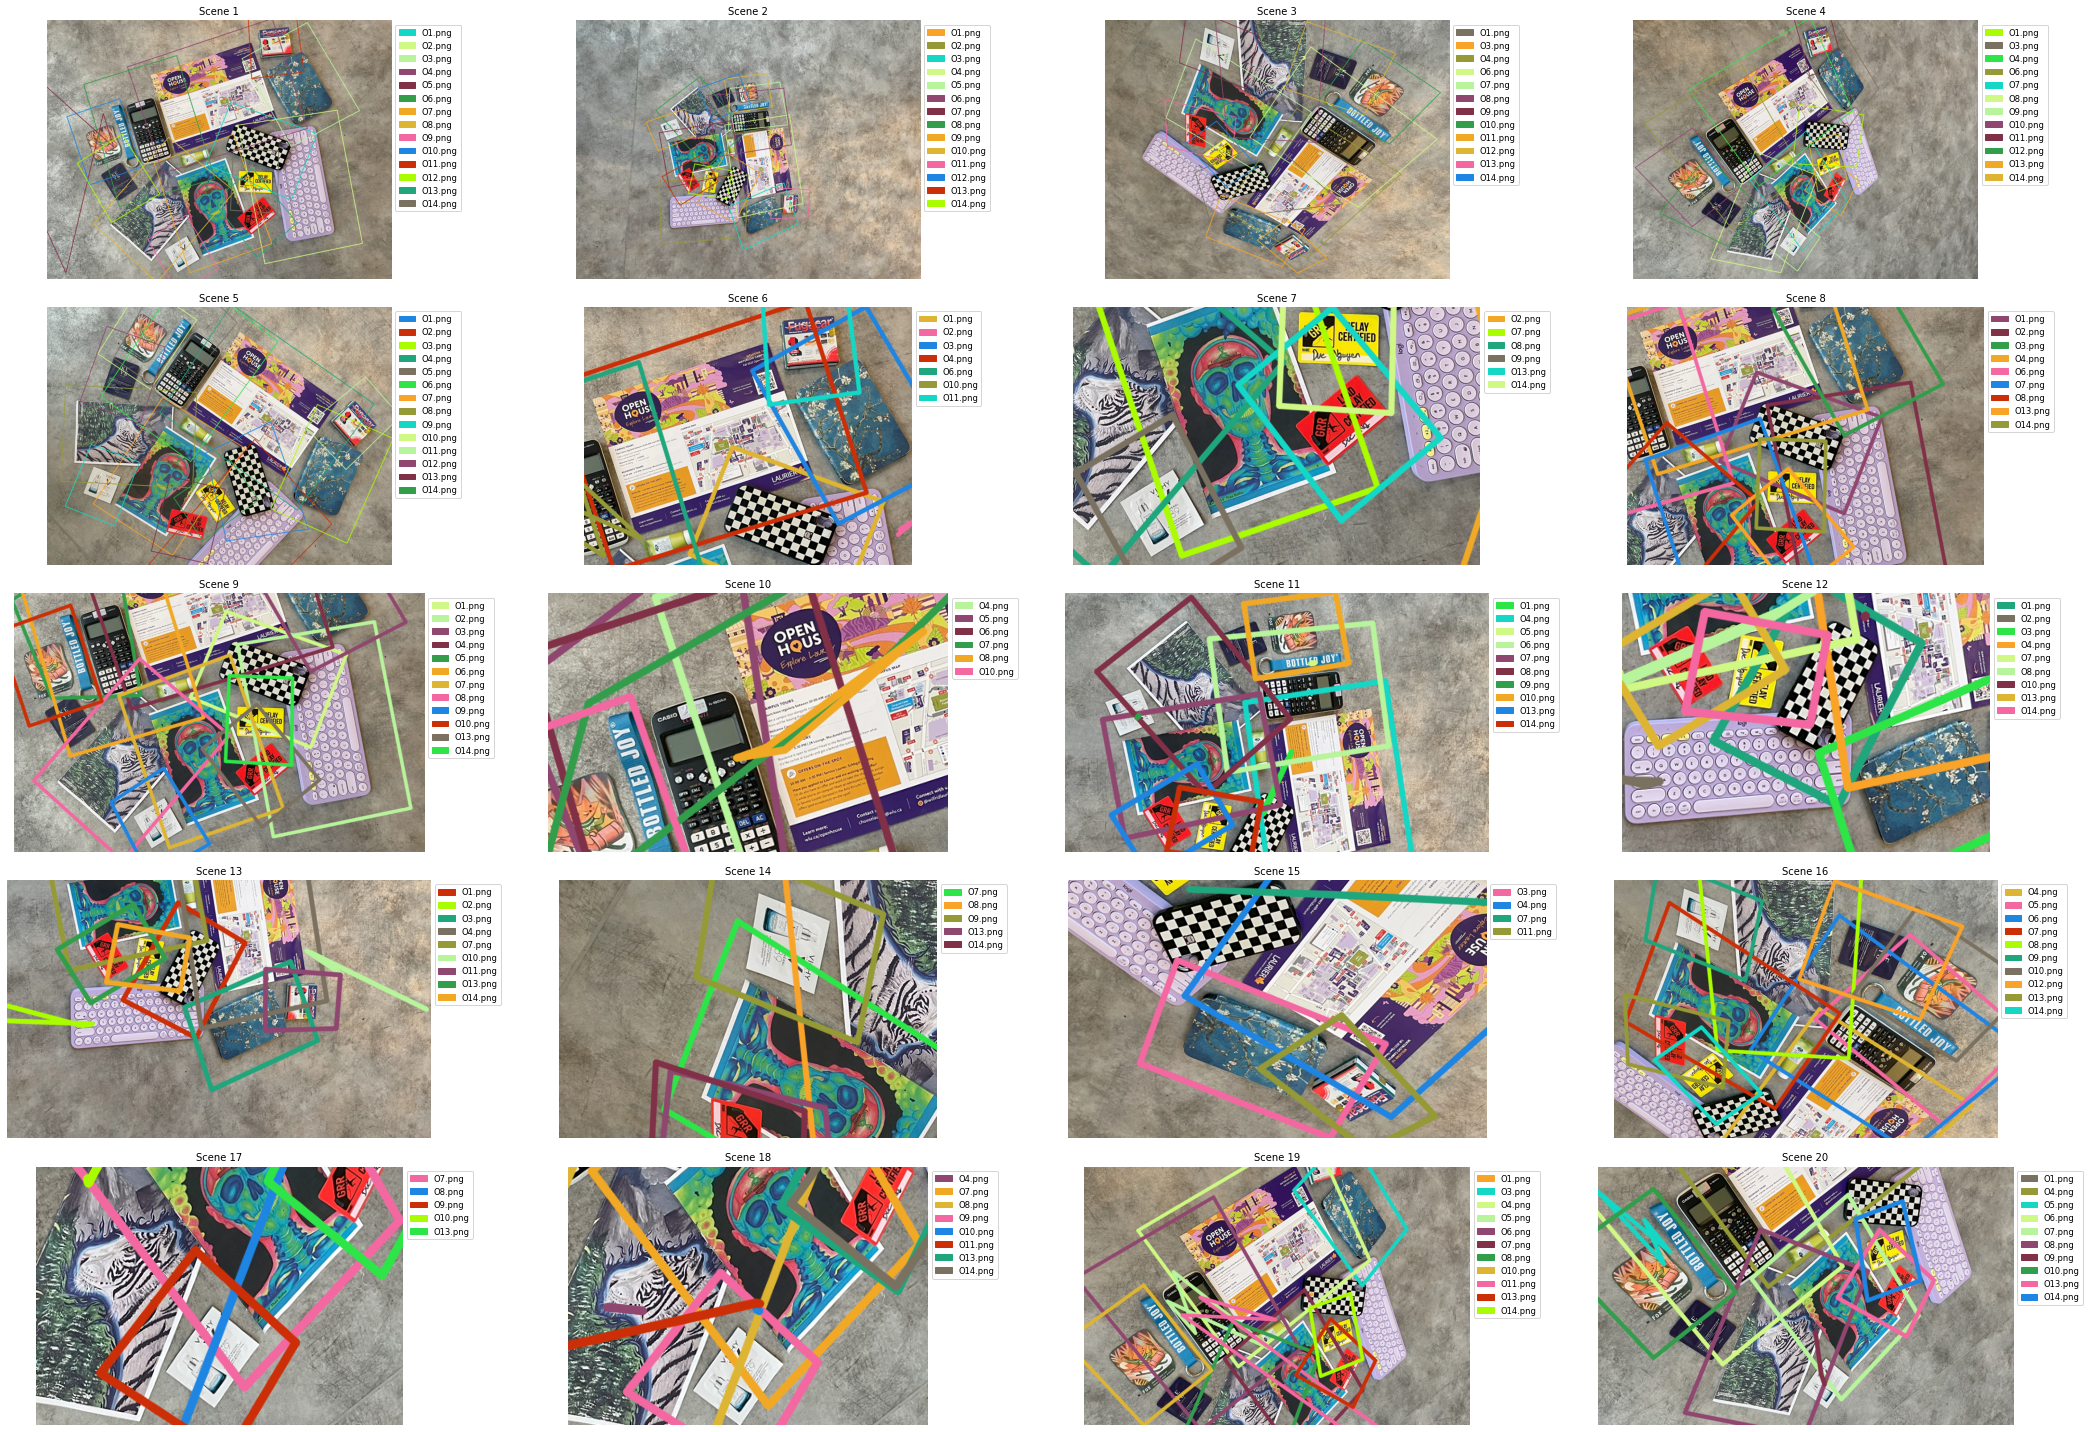

Scene_1 - True positive: 14, False positive: 0, FN: 1, True negative: 0
Scene_1 - Precision: 1.00, Recall: 0.93, F1-Score: 0.97, Accuracy: 0.93
Scene_2 - True positive: 14, False positive: 0, FN: 1, True negative: 0
Scene_2 - Precision: 1.00, Recall: 0.93, F1-Score: 0.97, Accuracy: 0.93
Scene_3 - True positive: 12, False positive: 0, FN: 3, True negative: 0
Scene_3 - Precision: 1.00, Recall: 0.80, F1-Score: 0.89, Accuracy: 0.80
Scene_4 - True positive: 12, False positive: 0, FN: 3, True negative: 0
Scene_4 - Precision: 1.00, Recall: 0.80, F1-Score: 0.89, Accuracy: 0.80
Scene_5 - True positive: 14, False positive: 0, FN: 1, True negative: 0
Scene_5 - Precision: 1.00, Recall: 0.93, F1-Score: 0.97, Accuracy: 0.93
Scene_6 - True positive: 6, False positive: 1, FN: 1, True negative: 0
Scene_6 - Precision: 0.86, Recall: 0.86, F1-Score: 0.86, Accuracy: 0.75
Scene_7 - True positive: 3, False positive: 3, FN: 2, True negative: 0
Scene_7 - Precision: 0.50, Recall: 0.60, F1-Score: 0.55, Accuracy:

In [123]:
sift = cv2.SIFT_create()
bf = cv2.BFMatcher()


def detect_and_draw_box_with_legend(object_img_path, scene_img, scene_keypoints, scene_descriptors, color, color_legend):
    # Reading the image using openCV
    object_img = cv2.imread(object_img_path)

    # Convert to Gray_scale image
    object_img_gray = cv2.cvtColor(object_img, cv2.COLOR_BGR2GRAY)

    # Using SIFT to detect keypoints and descriptors
    object_keypoints, object_descriptors = sift.detectAndCompute(object_img_gray, None)
    matches = bf.knnMatch(object_descriptors, scene_descriptors, k=2)
    good_matches = [m for m, n in matches if m.distance < 0.75 * n.distance]

    object_detected = False  # Initialize a flag for object detection

    if len(good_matches) > 16:
        src_pts = np.float32([object_keypoints[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
        dst_pts = np.float32([scene_keypoints[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)
        M, _ = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
        if M is not None:
            h, w = object_img_gray.shape
            pts = np.float32([[0, 0], [0, h], [w, h], [w, 0]]).reshape(-1, 1, 2)
            dst = cv2.perspectiveTransform(pts, M)
            scene_img = cv2.polylines(scene_img, [np.int32(dst)], True, color, 8, cv2.LINE_AA)
            color_legend.append((color, object_img_path.split('/')[-1]))
            object_detected = True  # Set the flag to True as the object is detected

    return scene_img, color_legend, object_detected


# Initialize color legend list
color_legend = []
scene_result = []
color_legend_result = []
count = 0

# *Initialize dictionary to store detection results for each scene
detected_objects = {scene: set() for scene in ground_truth}


# *Process each object image, draw boxes, and prepare the legend
for scene_name, scene_img_path in SCENE_DICT.items() : 
    # Read scene from each scene
    scene = cv2.imread(PATH_SCENE + str(SCENE_DICT[scene_name]) )

    # Reading scene keypoints and descriptors
    scene_keypoints, scene_descriptors = sift.detectAndCompute(scene, None)

    # Iterating through object dictionary and detect whether if they appear on the scene or not
    for object_name, object_img_path in OBJECT_DICT.items():
        # Using count to select color for each object 
        color = COLORS[count % len(COLORS)]
        count += 1

        # The main algorithm to detect object and labeled them
        scene_img, color_legend, detected = detect_and_draw_box_with_legend(PATH_OBJECT + object_img_path, scene, scene_keypoints, scene_descriptors,color, color_legend)
        
        # If the object is detected, add the mto detected_objects dict
        if detected:
            detected_objects[scene_name].add(object_name)

    # Keep track of all the scene, for future plot and display
    scene_result.append(scene_img)
    color_legend_result.append(color_legend)
    color_legend =[]


# Calculate the number of rows needed for the subplot
num_scenes = len(scene_result)
num_columns = 4
num_rows = num_scenes // num_columns + (num_scenes % num_columns > 0)

# Create a figure with subplots
fig, axes = plt.subplots(num_rows, num_columns, figsize=(30, num_rows * 4))
# Flatten the axes array for easy iteration
axes = axes.flatten()

# Go through each scene and its corresponding legend
for i, (scene_img, color_legend) in enumerate(zip(scene_result, color_legend_result)):
    # Convert the image to RGB for displaying in Matplotlib
    scene_img_rgb = cv2.cvtColor(scene_img, cv2.COLOR_BGR2RGB)
    
    # Display the scene image
    axes[i].imshow(scene_img_rgb)
    axes[i].set_title('Scene {}'.format(i + 1), fontsize=10)
    axes[i].axis('off')  # Hide the axis
    
    # Create a list of patches for the legend
    legend_patches = [mpatches.Patch(color=np.array(color[::-1])/255, label=name) for color, name in color_legend]
    axes[i].legend(handles=legend_patches, loc='upper left', bbox_to_anchor=(1, 1), fontsize='small')


# Hide any remaining empty subplots
for j in range(i + 1, num_columns * num_rows):
    axes[j].axis('off')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

# * This function used to calculate_metrics
def calculate_metrics(TP, FP, FN, TN):
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    accuracy = (TP + TN) / (TP + FP + FN + TN) if (TP + FP + FN + TN) > 0 else 0
    return precision, recall, f1_score, accuracy

for scene_name in ground_truth:
    TP = len(ground_truth[scene_name].intersection(detected_objects[scene_name]))
    FP = len(detected_objects[scene_name] - ground_truth[scene_name])
    FN = len(ground_truth[scene_name] - detected_objects[scene_name])
    TN = 0  # Typically not used in object detection


    precision, recall, f1_score, accuracy = calculate_metrics(TP, FP, FN, TN)
    print(f'{scene_name} - True positive: {TP}, False positive: {FP}, FN: {FN}, True negative: {TN}')
    print(f'{scene_name} - Precision: {precision:.2f}, Recall: {recall:.2f}, F1-Score: {f1_score:.2f}, Accuracy: {accuracy:.2f}')

<h3>Outputting the detected_objects</h3>

In [124]:
def draw_legend_on_image(img, color_legend):
    y_offset = 20
    for color, name in color_legend:
        # Increase rectangle size and adjust text placement
        cv2.rectangle(img, (10, y_offset), (50, y_offset + 30), color, -1)
        cv2.putText(img, name, (60, y_offset + 20), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)
        y_offset += 40  # Increase spacing between legend entries

# Process each scene and save the results
for i, (scene_img, color_legend) in enumerate(zip(scene_result, color_legend_result)):
    draw_legend_on_image(scene_img, color_legend)
    cv2.imwrite(f'../../Detected_Objects/S{i+1}_detected.png', scene_img)

<h3>Outputting the keypoints of objects and images</h3>

In [125]:
# Outputting the keypoints

def save_keypoints_images(img_path, keypoints, img_type, img_number):
    img = cv2.imread(img_path)
    img_with_keypoints = cv2.drawKeypoints(img, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    cv2.imwrite(f"../../Keypoints/{img_type}{img_number}_keypoints.png", img_with_keypoints)

# Process each scene image
for i, scene_img_path in enumerate(SCENE_DICT.values()):
    scene_img = cv2.imread(PATH_SCENE + scene_img_path)
    scene_keypoints, _ = sift.detectAndCompute(scene_img, None)
    save_keypoints_images(PATH_SCENE + scene_img_path, scene_keypoints, "S", i+1)

# Process each object image
for i, object_img_path in enumerate(OBJECT_DICT.values()):
    object_img = cv2.imread(PATH_OBJECT + object_img_path)
    object_keypoints, _ = sift.detectAndCompute(object_img, None)
    save_keypoints_images(PATH_OBJECT + object_img_path, object_keypoints, "O", i+1)


<h3>Ouputting Matches</h3>

In [126]:
PATH_MATCH = "../../Matches/"  # Relative path to the 'Matches' directory in the parent folder

# Iterate over each scene and each object to save the matched images
for scene_index, (scene_name, scene_img) in enumerate(zip(SCENE_DICT.keys(), scene_result)):
    for object_index, object_name in enumerate(OBJECT_DICT.keys()):
        # Construct the filename using the specified format: Sx_Oy_matches.jpg
        filename = f"S{scene_index+1}_O{object_index+1}_matches.jpg"
        file_path = f"{PATH_MATCH}/{filename}"

        # Save the scene image with matches
        cv2.imwrite(file_path, scene_img)


<h2>Task 2</h2>

True

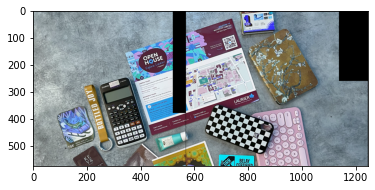

In [127]:

def stitch_images(img1, img2):
    # Convert images to grayscale
    gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

    # Initialize SIFT detector
    sift = cv2.SIFT_create()

    # Find keypoints and descriptors with SIFT
    keypoints1, descriptors1 = sift.detectAndCompute(gray1, None)
    keypoints2, descriptors2 = sift.detectAndCompute(gray2, None)

    # Match descriptors using FLANN matcher
    FLANN_INDEX_KDTREE = 1
    index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
    search_params = dict(checks=50)
    flann = cv2.FlannBasedMatcher(index_params, search_params)
    
    matches = flann.knnMatch(descriptors1, descriptors2, k=2)

    # Apply Lowe's ratio test
    good_matches = []
    for m, n in matches:
        if m.distance < 0.7 * n.distance:
            good_matches.append(m)

    # Minimum number of matches
    MIN_MATCH_COUNT = 10
    if len(good_matches) > MIN_MATCH_COUNT:
        # Extract location of good matches
        points1 = np.float32([keypoints1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
        points2 = np.float32([keypoints2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

        # Find homography
        M, _ = cv2.findHomography(points2, points1, cv2.RANSAC, 5.0)

        # Warp and stitch images
        if M is not None:
            height, width = img1.shape[:2]
            img2_warped = cv2.warpPerspective(img2, M, (width * 2, height))
            stitched = np.copy(img2_warped)
            stitched[0:height, 0:width] = img1

            # Find the non-black (non-zero) regions in the stitched image
            gray = cv2.cvtColor(stitched, cv2.COLOR_BGR2GRAY)
            _, thresh = cv2.threshold(gray, 1, 255, cv2.THRESH_BINARY)

            # Find contours and the bounding rectangle
            contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
            x, y, w, h = cv2.boundingRect(contours[0])

            # Crop the image
            cropped = stitched[y:y+h, x:x+w]
            return cropped
        else:
            print("Homography could not be computed.")
            return None
    else:
        print(f"Not enough matches are found - {len(good_matches)}/{MIN_MATCH_COUNT}")
        return None
    
# Load all images
PATH = '../../Scenes/'

image_paths = ['S21.png', 'S22.png','S23.png','S27.png', 'S24.png', 'S25.png', 'S26.png']  # Add all 20 image paths
images = [cv2.imread(PATH + image_path) for image_path in image_paths]

# Sequentially stitch images    
# Sequentially stitch images
result = images[0]
for i in range(1, len(images)):
    stitched_result = stitch_images(result, images[i])
    
    # Update result only if stitching is successful
    if stitched_result is not None:
        result = stitched_result
    else:
        print(f"Stitching failed at iteration {i}. Continuing with the last successful result.")


# Display the final stitched image
plt.imshow(result)
cv2.imwrite("../../Scenes/Stitched_Scene.png", result)


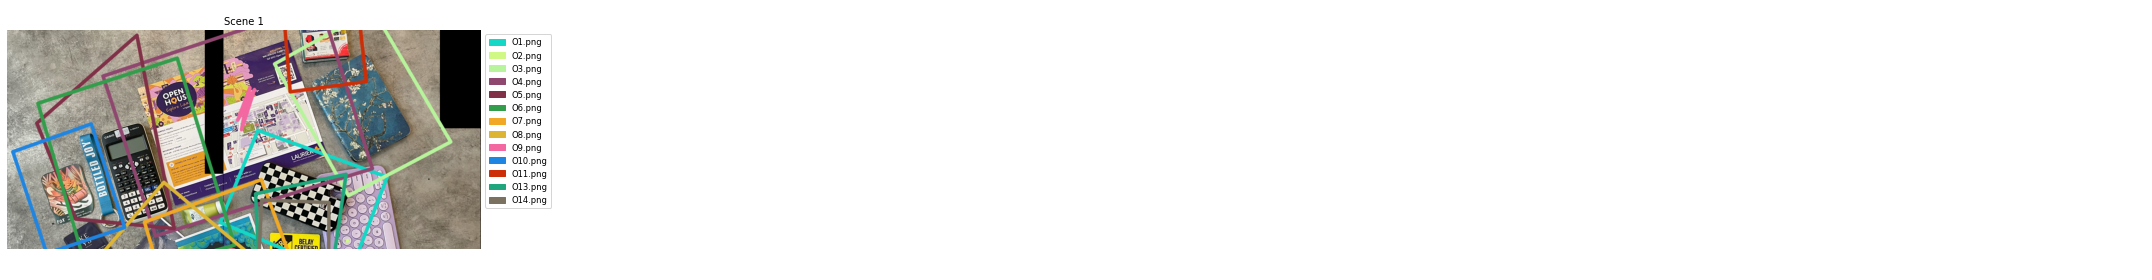

In [128]:
# Initialize color legend list
color_legend = []
scene_result = []
color_legend_result = []
count = 0

# *Initialize dictionary to store detection results for each scene
detected_objects = {scene: set() for scene in ground_truth}

# Read scene from each scene
scene = cv2.imread('../../Scenes/Stitched_Scene.png' )

# Reading scene keypoints and descriptors
scene_keypoints, scene_descriptors = sift.detectAndCompute(scene, None)

# Iterating through object dictionary and detect whether if they appear on the scene or not
for object_name, object_img_path in OBJECT_DICT.items():
    # Using count to select color for each object 
    color = COLORS[count % len(COLORS)]
    count += 1

    # The main algorithm to detect object and labeled them
    scene_img, color_legend, detected = detect_and_draw_box_with_legend(PATH_OBJECT + object_img_path, scene, scene_keypoints, scene_descriptors,color, color_legend)
    
    # If the object is detected, add the mto detected_objects dict
    if detected:
        detected_objects[scene_name].add(object_name)

# Keep track of all the scene, for future plot and display
scene_result.append(scene_img)
color_legend_result.append(color_legend)
color_legend =[]


# Calculate the number of rows needed for the subplot
num_scenes = len(scene_result)
num_columns = 4
num_rows = num_scenes // num_columns + (num_scenes % num_columns > 0)

# Create a figure with subplots
fig, axes = plt.subplots(num_rows, num_columns, figsize=(30, num_rows * 4))
# Flatten the axes array for easy iteration
axes = axes.flatten()

# Go through each scene and its corresponding legend
for i, (scene_img, color_legend) in enumerate(zip(scene_result, color_legend_result)):
    # Convert the image to RGB for displaying in Matplotlib
    scene_img_rgb = cv2.cvtColor(scene_img, cv2.COLOR_BGR2RGB)
    
    # Display the scene image
    axes[i].imshow(scene_img_rgb)
    axes[i].set_title('Scene {}'.format(i + 1), fontsize=10)
    axes[i].axis('off')  # Hide the axis
    
    # Create a list of patches for the legend
    legend_patches = [mpatches.Patch(color=np.array(color[::-1])/255, label=name) for color, name in color_legend]
    axes[i].legend(handles=legend_patches, loc='upper left', bbox_to_anchor=(1, 1), fontsize='small')


# Hide any remaining empty subplots
for j in range(i + 1, num_columns * num_rows):
    axes[j].axis('off')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()
